In [23]:
import pandas as pd

In [24]:
categories = [["false belief", "transparent access", "in->on", "trusted testimony", "other person"],
              ["false belief", "true belief", "transparent access", "uninformative label", "trusted testimony", "late label"]]
models = ["text-davinci-001", "text-davinci-002", "text-davinci-003", "GPT-3.5-Turbo", "GPT-4"]
tasks = ["Unexpected Transfer", "Unexpected Contents"]


lms = [model for mdl_lst in [[model] * len(categories[0]) for model in models] + 
       [[model] * len(categories[1]) for model in models] for model in mdl_lst]
# accuracies = [0.55, 0.25, 0.143, 0.444, 0.5, 0.15, 0.667, 0.714, 0.889, 0.938, 
#               0.35, 0.5, 0.286, 0.944, 0.875, 0.55, 0.417, 0.143, 0.667, 0.75, 
#               1, 0, 0, 0.611, 0.75, 
# #               0.35, 0.7, 0.438, 0.632, 0.7, 0.8, 0.65, 0.6, 0.562, 0.474, 0.6, 0.333,
# #               0.5, 0.6, 0.375, 0.579, 0.7, 0.8, 0.65, 0.4, 0.5, 0.158, 0.4, 0.267,
# #               1, 0.4, 0.938, 0.316, 0.55, 0.467]
#               0.25, 0.65, 0.5, 0.632, 0.75, 0.733, 0.55, 0.65, 0.625, 0.579, 0.75, 0.4,
#               0.45, 0.8, 0.375, 0.632, 0.9, 0.667, 0.6, 0.3, 0.562, 0.316, 0.65, 0.4,
#               1, 0.6, 0.938, 0.263, 0.8, 0.4]
#q2
# accuracies = [   0.35, 0.75, 0.286, 0.667, 0.75,
#                  0.3, 0.667, 0.714, 0.778, 0.938,
#                  0.3, 0.583, 0.571, 0.833, 0.875,
#                  0.75, 0.333, 0.143, 0.556, 0.688,
#                  0.95, 0, 0, 0.944, 0.688,
#                  0.7, 0.6, 0.25, 0.316, 0.6, 0.333,
#                  0.75, 0.9, 0.438, 0.421, 0.8, 0.267,
#                  0.45, 0.95, 0.75, 0.737, 0.9, 0.8, 
#                  1, 0.85, 0, 0.158, 0.6, 0.133, 
#                  1, 1, 0, 0.211, 0.95, 0.067, 
#                 ]
# #q3
# accuracies = [0.4, 0.583, 0.143, 0.611, 0.5,
#               0.15, 0.667, 0.714, 0.833, 0.938,
#               0.35, 0.5, 0.571, 0.833, 0.875,
#               0.5, 0.417, 0.143, 0.667, 0.75,
#               1, 0, 0, 0.722, 0.688,
#              0.55, 0.6, 0.438, 0.526, 0.65, 0.533,
#              0.25, 1, 0.75, 0.789, 0.9, 0.6, 
#              0.25, 0.95, 0.812, 0.895, 0.9, 0.733,
#              0.75, 0.95, 0.375, 0.474, 0.9, 0.467,
#              1, 1, 0.375, 0.474, 0.9, 0.6]

#avg q2,q3
accuracies = [0.375, 0.667, 0.215, 0.639, 0.625,
              0.225, 0.667, 0.714, 0.806, 0.938,
              0.325, 0.542, 0.571, 0.833, 0.875,
              0.625, 0.375, 0.143, 0.612, 0.719,
              0.975, 0, 0, 0.833, 0.688,
             0.625, 0.6, 0.344, 0.421, 0.625, 0.433,
             0.5, 0.95, 0.594, 0.605, 0.85, 0.434,
             0.35, 0.95, 0.781, 0.816, 0.9, 0.767,
             0.875, 0.9, 0.188, 0.316, 0.75, 0.3,
             1, 1, 0.188, 0.343, 0.925, 0.334]


accuracies = [acc*100 for acc in accuracies]
task_names = [tasks[0]] * len(models) * len(categories[0]) + [tasks[1]] * len(models) * len(categories[1])
category_names = [cat for cat_lst in [categories[0]] * len(models) + [categories[1]] * len(models) for cat in cat_lst]

df = pd.DataFrame.from_dict({"LM": lms, "Task": task_names, "Category": category_names, "Accuracy": accuracies})
df.head()

,LM,Task,Category,Accuracy
0,text-davinci-001,Unexpected Transfer,false belief,37.5
1,text-davinci-001,Unexpected Transfer,transparent access,66.7
2,text-davinci-001,Unexpected Transfer,in->on,21.5
3,text-davinci-001,Unexpected Transfer,trusted testimony,63.9
4,text-davinci-001,Unexpected Transfer,other person,62.5


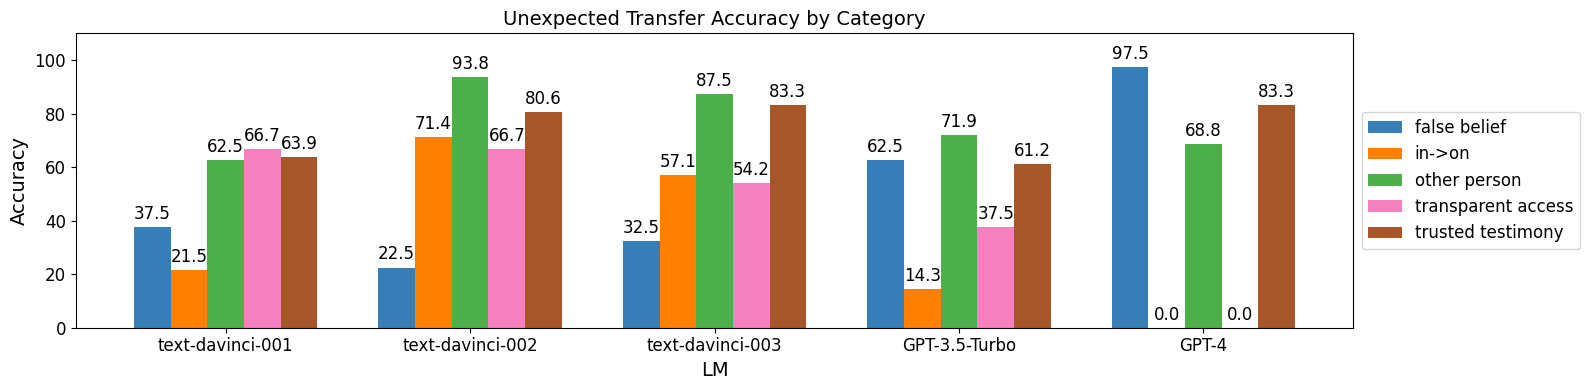

In [25]:
import re
import numpy as np
import matplotlib.pyplot as plt


lm_to_index = {lm: int(float(re.search("[0-9.]+", lm)[0]) * 2) for lm in models}


def draw_for_task(task):
    plt.figure(figsize=(16, 4))
    curr = df[df["Task"] == task]

    # Group by model and category, and calculate mean accuracy
    grouped = curr.groupby(["Category", "LM"])["Accuracy"].mean()

    # Unstack the grouped data to create a DataFrame with model as columns and category as index
    unstacked = grouped.unstack(level=0)
    
    # Sort the columns of the unstacked DataFrame
    unstacked = unstacked.sort_values(by=["LM"], key=lambda x: x.map(lm_to_index))
    
    # Define the offset for the X series
    offset = 0.15
    
    # Create the grouped bar chart
    ax = plt.subplot(111)
    x_values = np.arange(len(unstacked.index))
    colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3']
    for i, (model, series) in enumerate(unstacked.items()):
        ax.bar(x_values + i*offset, series.values, width=offset, align='center', label=model, color=colors[i%len(colors)])
        
        # Add the y values on top of the bars
        for j, v in enumerate(series.values):
            ax.text(x_values[j] + i*offset, v + 3, f"{v:.1f}", ha='center', fontsize=12)

    # Set the axis tick labels and limits
    ax.set_xticks(x_values + offset*len(unstacked.columns)/2 - offset/2)
    ax.set_xticklabels(unstacked.index, fontsize=14)
    ax.set_ylim([0, 110])
    ax.tick_params(axis='both', which='major', labelsize=12)

    # Set the title and axis labels
    ax.set_title(f"{task} Accuracy by Category", fontsize=14)
    ax.set_xlabel("LM", fontsize=14)
    ax.set_ylabel("Accuracy", fontsize=14)
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
    plt.tight_layout()
    plt.savefig(f"{task}.png", facecolor='white', transparent=False)
    plt.show()


draw_for_task(tasks[0])

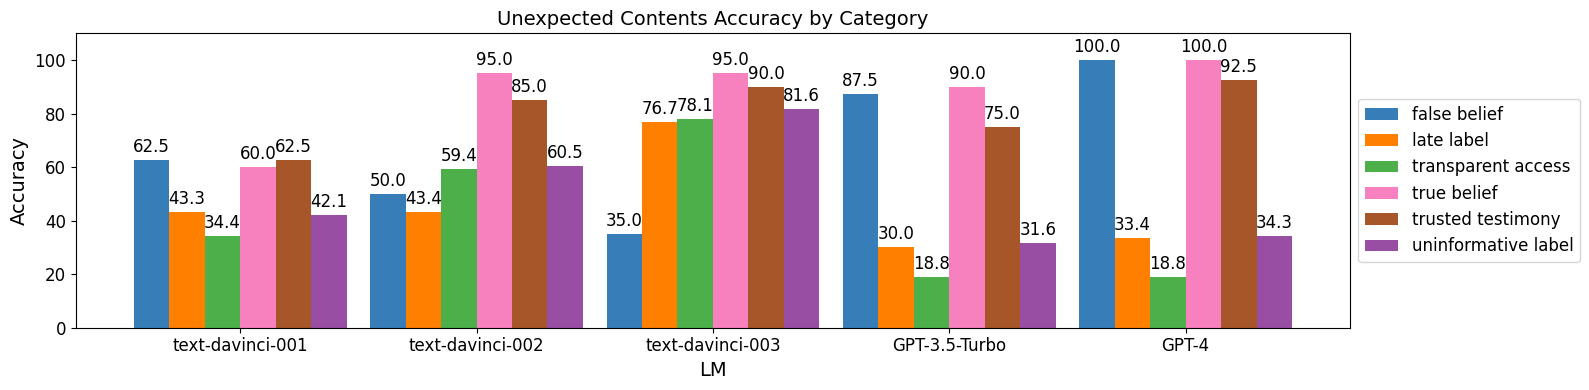

In [26]:
draw_for_task(tasks[1])